In [1]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Изображения являются 28х28 массивами NumPy, где значение пикселей варьируется от 0 до 255. Метки (labels) - это массив целых чисел от 0 до 9. Они соответствуют классам одежды изображенной на картинках:

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
#создадим массив классов, сответсвтующий меткам
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

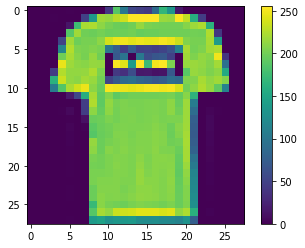

In [8]:
#посмотрим элемент в train_images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#поскольку значения пикселей находятся в диапазоне от 0-255, нам надо их привести к диапазону от 0-1

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

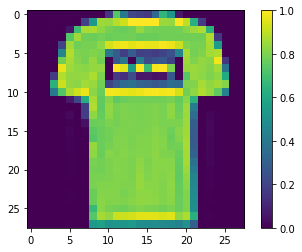

In [11]:
#посмотрим элемент в train_images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

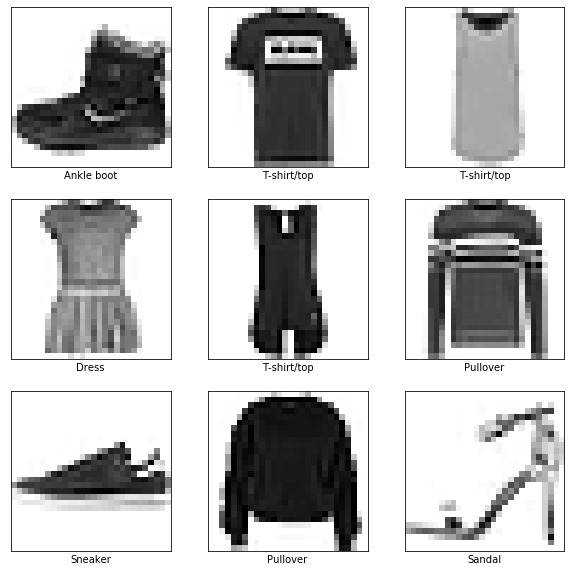

In [12]:
plt.figure(figsize=(10,10))

#выведем первые 10 элементов тренировочной сети, подпишем классы к которым они принадлежат
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#начинаем настраивать слои

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Первый слой этой сети - tf.keras.layers.Flatten, преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

После разложения пикселей, нейросеть содержит два слоя tf.keras.layers.Dense. Это полносвязные нейронные слои. Первый Dense слой состоит из 128 узлов (или нейронов). Второй (и последний) 10-узловой softmax слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый узел содержит оценку указывающую вероятность принадлежности изображения к одному из 10 классов.

In [14]:
#компилируем модель

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Функция потерь (Loss function) — измеряет точность модели во время обучения. Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
Оптимизатор (Optimizer) — показывает каким образом обновляется модель на основе входных данных и функции потерь.
Метрики (Metrics) — используются для мониторинга тренировки и тестирования модели. Наш пример использует метрику accuracy равную доле правильно классифицированных изображений.

In [15]:
#Обучим модель
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4981 - accuracy: 0.8246
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8649
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8778
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8842
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8899
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8966
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9004
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9043
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9085
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [24]:
#оценим точность

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.3505 - accuracy: 0.8778

Точность на проверочных данных: 0.8777999877929688


In [ ]:
#переобучена модель

In [25]:
#делаем предсказания 
predictions = model.predict(test_images)

In [26]:
#посмотрим на первое предсказание
predictions[0]

array([1.4394279e-09, 5.6200228e-11, 1.4780675e-08, 5.8239014e-08,
       3.2109602e-07, 4.2261418e-02, 2.1496292e-07, 2.1076992e-02,
       1.0315594e-03, 9.3562937e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

как будто ботинок

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

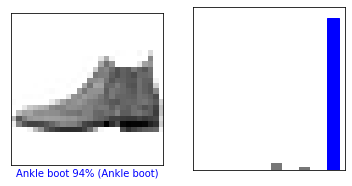

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

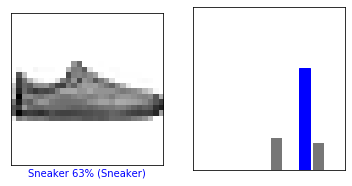

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#цвет верных предсказаний синий, неверных красный

In [ ]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 10
num_cols =5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [33]:
# Берем одну картинку из проверочного сета.
img = test_images[0]

print(img.shape)

(28, 28)


In [34]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4394280e-09 5.6200131e-11 1.4780649e-08 5.8239021e-08 3.2109577e-07
  4.2261373e-02 2.1496295e-07 2.1076979e-02 1.0315585e-03 9.3562949e-01]]


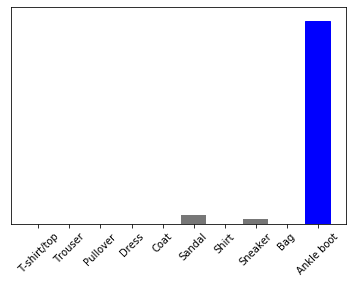

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

9